# Student Mental Health Prediction System

#### In the view of Student Health Parameters We predict that the student is Normal or Need any Treatment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/soppoju narender/Desktop/FS-DataScience/ML_module/Student_Mental_Health_Prediction/Student Mental health.csv")

In [3]:
data.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [4]:
data.shape

(101, 11)

In [5]:
data.drop(columns=['Timestamp'],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    object 
 1   Age                                           100 non-null    float64
 2   What is your course?                          101 non-null    object 
 3   Your current year of Study                    101 non-null    object 
 4   What is your CGPA?                            101 non-null    object 
 5   Marital status                                101 non-null    object 
 6   Do you have Depression?                       101 non-null    object 
 7   Do you have Anxiety?                          101 non-null    object 
 8   Do you have Panic attack?                     101 non-null    object 
 9   Did you seek any specialist for a treatment?  101 non-null    obj

In [7]:
data.duplicated().any()

False

In [8]:
data.nunique()

Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

# Feature Engineering

In [9]:
data.rename(columns={'Choose your gender':'Gender',
                     'What is your course?':'Cource',
             'Your current year of Study':'Year',
             'What is your CGPA?':'CGPA',
             'Do you have Depression?':'Depression',
            'Do you have Anxiety?':'Anxiety',
            'Marital status':'Marital_status',
            'Do you have Panic attack?':'Panic_Attack',
            'Did you seek any specialist for a treatment?':'Treatment'},inplace=True)

In [10]:
data.head(10)

,Gender,Age,Cource,Year,CGPA,Marital_status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [11]:
data['Cource'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [12]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [13]:
data['CGPA'].replace({'3.00 - 3.49':3.5,
                              '3.50 - 4.00':4.0,
                      '3.50 - 4.00 ':4.0,
                              '2.50 - 2.99':2.75,
                             '2.00 - 2.49':2.25,
                             '0 - 1.99':1.0},inplace=True)

In [14]:
data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [15]:
data['Year'].replace({'year 1':1,
                     'year 2':2,
                     'Year 1':1,
                     'year 3':3,
                     'year 4':4,
                     'Year 2':2,
                     'Year 3':3},inplace=True)

In [16]:
data['Year'].unique()

array([1, 2, 3, 4], dtype=int64)

In [17]:
data.isna().any()

Gender            False
Age                True
Cource            False
Year              False
CGPA              False
Marital_status    False
Depression        False
Anxiety           False
Panic_Attack      False
Treatment         False
dtype: bool

In [18]:
data.dropna(inplace=True)

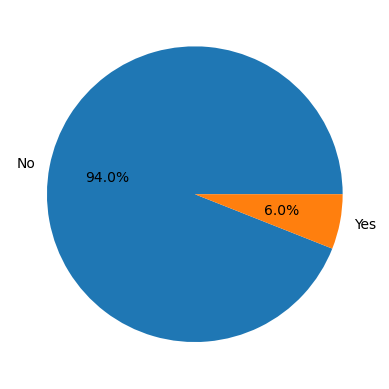

In [19]:
plt.pie(data['Treatment'].value_counts(),labels=['No','Yes'],autopct="%1.1f%%")
plt.show()

### Most of the students in dataset set are normal 

In [20]:
data.columns

Index(['Gender', 'Age', 'Cource', 'Year', 'CGPA', 'Marital_status',
       'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

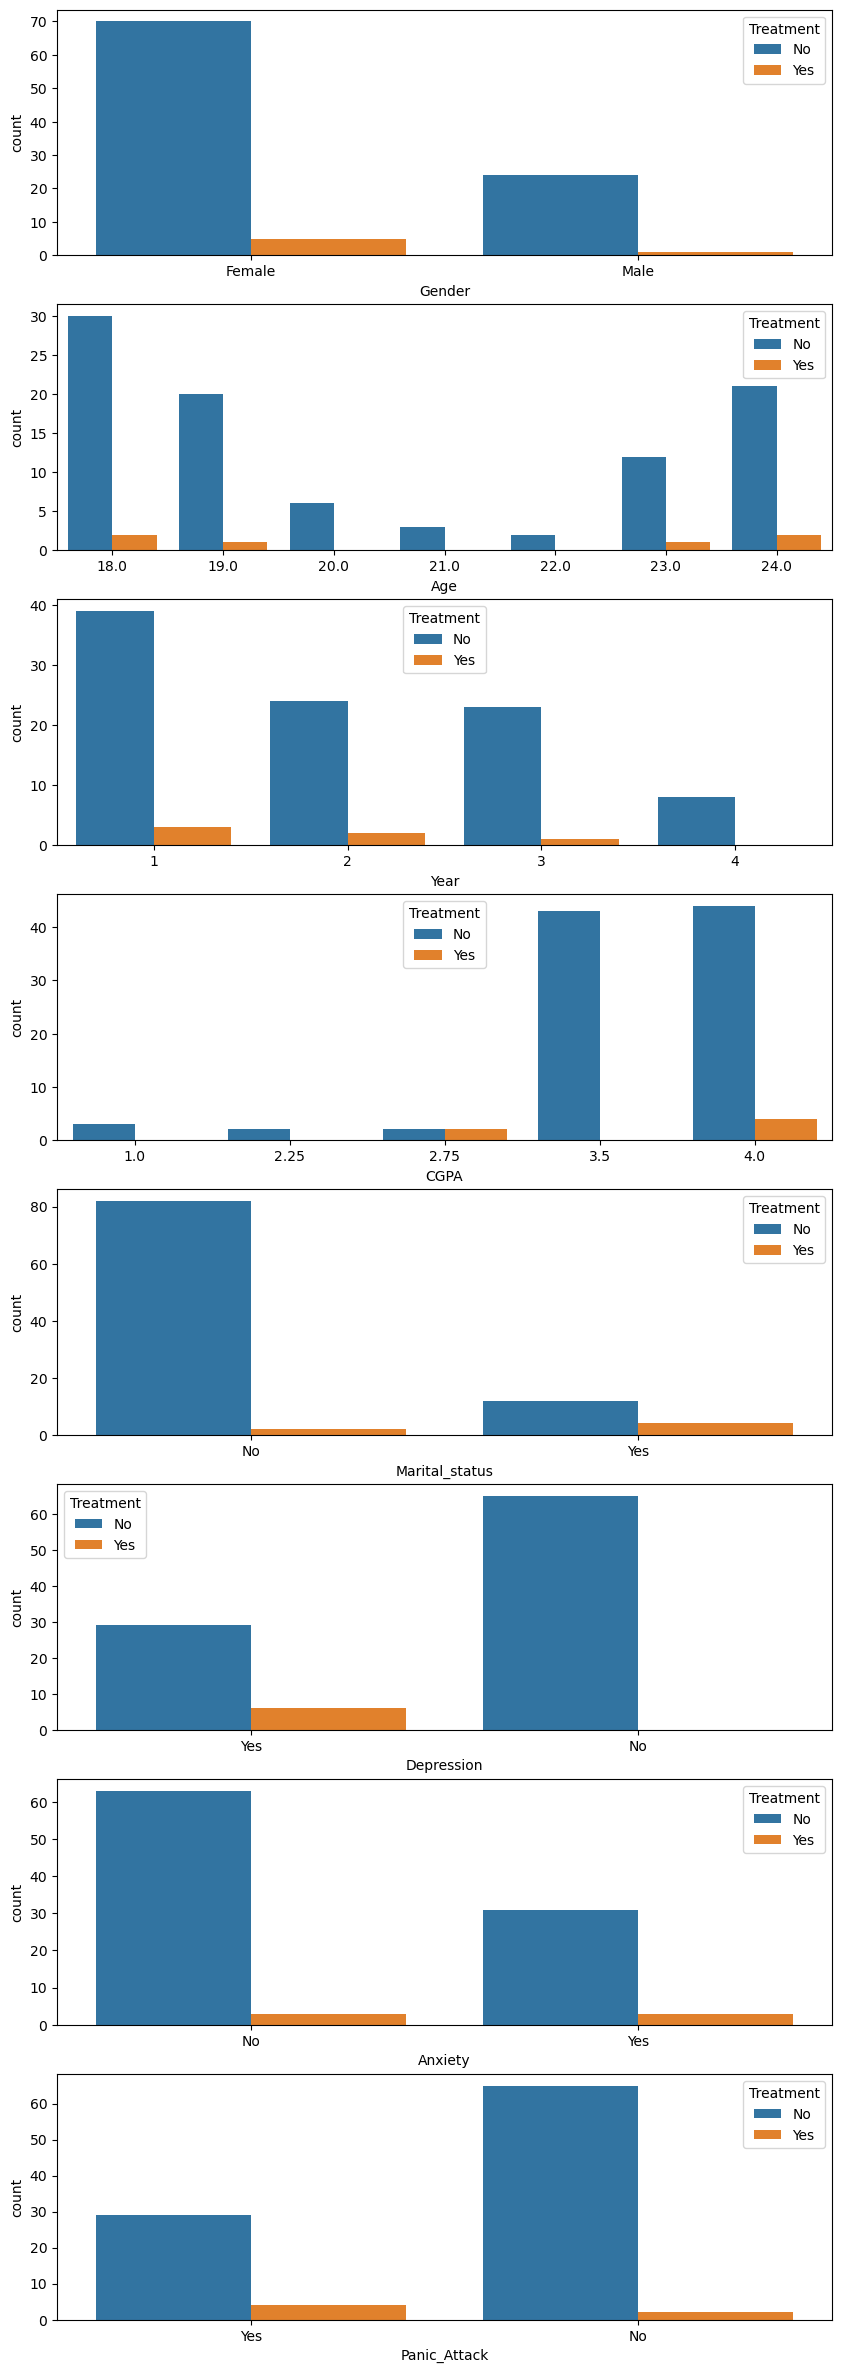

In [21]:
fig, ax = plt.subplots(8, 1, figsize = (10,30))

cols =['Gender', 'Age', 'Year', 'CGPA', 'Marital_status',
       'Depression', 'Anxiety', 'Panic_Attack']
for i ,val in enumerate(cols):
    sns.countplot(x = val,hue='Treatment', data = data, ax = ax[i])

# Observation 

### students who scores 2.75 that means average marks they are high chance to seek treatment.

### People who are committed or not single they are very high chance to get to seek treatment.

### People who are in depression they lead more chances to seek Treatment.

### conclusion : Marks,Martial Status,Depression these columns are most effected in Student Mental Health...

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender', 'Marital_status',
       'Depression', 'Anxiety', 'Panic_Attack','Treatment','Cource']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [23]:
data.head(10)

,Gender,Age,Cource,Year,CGPA,Marital_status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,17,1,3.50,0,1,0,1,0
1,1,21.0,25,2,3.50,0,0,1,0,0
2,1,19.0,4,1,3.50,0,1,1,1,0
3,0,22.0,33,3,3.50,1,1,0,0,0
4,1,23.0,37,4,3.50,0,0,0,0,0
5,1,19.0,17,2,4.00,0,0,0,1,0
6,0,23.0,41,2,4.00,1,1,0,1,0
7,0,18.0,2,1,4.00,0,0,1,0,0
8,0,19.0,20,2,2.75,0,0,0,0,0
9,1,18.0,23,1,4.00,0,0,1,1,0


## Feature Selection

In [24]:
data.columns

Index(['Gender', 'Age', 'Cource', 'Year', 'CGPA', 'Marital_status',
       'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [25]:
from sklearn.feature_selection import chi2
x1=data[['Gender', 'Age', 'Cource', 'Year', 'CGPA', 'Marital_status',
       'Depression', 'Anxiety', 'Panic_Attack']]
y1=data['Treatment']

In [26]:
score=chi2(x1,y1)
score

(array([1.77304965e-01, 6.86799805e-02, 9.36982577e+00, 3.16498316e-01,
        1.25734268e-03, 1.02411348e+01, 7.70516717e+00, 4.80600751e-01,
        2.19234902e+00]),
 array([0.67369961, 0.79326851, 0.00220586, 0.57371967, 0.97171372,
        0.00137343, 0.0055063 , 0.48815033, 0.13869765]))

In [27]:
p_val=pd.Series(score[1],index=x1.columns)
p_val

Gender            0.673700
Age               0.793269
Cource            0.002206
Year              0.573720
CGPA              0.971714
Marital_status    0.001373
Depression        0.005506
Anxiety           0.488150
Panic_Attack      0.138698
dtype: float64

In [28]:
indep=[]
for x in p_val.index:
    if p_val[x]<=0.5:
        print(x,"\n-->Reject Null Hypo")
    else:
        print(x,"\n-->Accept Null Hypo")
        indep.append(x)
print(indep)

Gender 
-->Accept Null Hypo
Age 
-->Accept Null Hypo
Cource 
-->Reject Null Hypo
Year 
-->Accept Null Hypo
CGPA 
-->Accept Null Hypo
Marital_status 
-->Reject Null Hypo
Depression 
-->Reject Null Hypo
Anxiety 
-->Reject Null Hypo
Panic_Attack 
-->Reject Null Hypo
['Gender', 'Age', 'Year', 'CGPA']


In [29]:
data.drop(columns=indep,inplace=True)

In [30]:
data.head(10)

,Cource,Marital_status,Depression,Anxiety,Panic_Attack,Treatment
0,17,0,1,0,1,0
1,25,0,0,1,0,0
2,4,0,1,1,1,0
3,33,1,1,0,0,0
4,37,0,0,0,0,0
5,17,0,0,0,1,0
6,41,1,1,0,1,0
7,2,0,0,1,0,0
8,20,0,0,0,0,0
9,23,0,0,1,1,0


# Builing Model & Evalution

In [31]:
X=data.drop('Treatment',axis=1)
y=data['Treatment']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=30)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75, 5), (25, 5), (75,), (25,))

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5)

In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [36]:
p_rf=rf.predict(X_test)
p_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [37]:
from sklearn.metrics import roc_auc_score,f1_score, classification_report

In [38]:
#print("auc Score: ", roc_auc_score(y_test,p_rf))
print("F1 Score: ", f1_score(y_test,p_rf))
print(classification_report(y_test, p_rf))

F1 Score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [39]:
!pip install imblearn

# Handiling Imbalanced Data Using SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 23)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [43]:
p_rf=rf.predict(X_test)
p_rf

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

In [44]:
print("Accuracy Score: ", accuracy_score(y_test,p_rf))
print("F1-Score: ", f1_score(y_test, p_rf))
print("AUC-Score: ", roc_auc_score(y_test, p_rf))
print(classification_report(y_test, p_rf))

Accuracy Score:  0.7021276595744681
F1-Score:  0.5625
AUC-Score:  0.6956521739130435
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        24
           1       1.00      0.39      0.56        23

    accuracy                           0.70        47
   macro avg       0.82      0.70      0.67        47
weighted avg       0.81      0.70      0.67        47



# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
dt_pred=dt.predict(X_test)

In [47]:
print("Accuracy Score: ", accuracy_score(y_test,dt_pred))
print("F1-Score: ", f1_score(y_test,dt_pred))
print("AUC-Score: ", roc_auc_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

Accuracy Score:  0.8936170212765957
F1-Score:  0.888888888888889
AUC-Score:  0.8931159420289854
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.91      0.87      0.89        23

    accuracy                           0.89        47
   macro avg       0.89      0.89      0.89        47
weighted avg       0.89      0.89      0.89        47



# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [49]:
model.fit(X_train,y_train)

GaussianNB()

In [50]:
n_pred=model.predict(X_test)

In [51]:
print("Accuracy Score: ", accuracy_score(y_test,n_pred))
print("F1-Score: ", f1_score(y_test,n_pred))
print("AUC-Score: ", roc_auc_score(y_test,n_pred))
print(classification_report(y_test,n_pred))

Accuracy Score:  0.7872340425531915
F1-Score:  0.8214285714285715
AUC-Score:  0.7916666666666666
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        24
           1       0.70      1.00      0.82        23

    accuracy                           0.79        47
   macro avg       0.85      0.79      0.78        47
weighted avg       0.85      0.79      0.78        47



# LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [53]:
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
lr_pred=lr.predict(X_test)

In [55]:
print("Accuracy Score: ", accuracy_score(y_test,dt_pred))
print("F1-Score: ", f1_score(y_test,dt_pred))
print("AUC-Score: ", roc_auc_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

Accuracy Score:  0.8936170212765957
F1-Score:  0.888888888888889
AUC-Score:  0.8931159420289854
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.91      0.87      0.89        23

    accuracy                           0.89        47
   macro avg       0.89      0.89      0.89        47
weighted avg       0.89      0.89      0.89        47



## After applying classification models 

## DecisionTreeClassifier Model performs good with 89% accuracy 

In [56]:
# saving model in pickle format
import pickle 
pickle_out = open("Student_Mental_Health_System.pkl", mode = "wb")
pickle.dump(dt,pickle_out)
pickle_out.close()

In [57]:
data.columns

Index(['Cource', 'Marital_status', 'Depression', 'Anxiety', 'Panic_Attack',
       'Treatment'],
      dtype='object')

In [58]:
data['Cource'].unique()

array([17, 25,  4, 33, 37, 41,  2, 20, 23, 42, 26,  1, 14, 36, 28,  5,  9,
       32, 27, 45, 44, 16,  0,  7, 47, 29,  3,  6, 22, 10, 46, 15, 34, 35,
       31, 21,  8, 11, 13, 40, 43, 48, 19, 12, 30, 18, 24, 38, 39])

In [60]:
data['Marital_status'].unique()

array([0, 1])